In [1]:
import torch

In [2]:
# import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass
from graph_class import Graph

In [4]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [5]:
rgb_lables = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

In [23]:
# Network configuration

data = rgb_colors
data_lables = rgb_lables
batch_size = 2


sigma = None

# for now amount_verticies has to be a multiplication of length and width
length = 5
width = 5
number_epochs = 1000
shuffle = True

learning_rate = 0.01

In [24]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]

In [25]:
building_labels = building_sizes

In [26]:
#Training inputs for RGBcolors
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [0.9], [0.33], [0.4], [0.67], [.33], [.5]]

In [27]:
gray_colors_lables = [[0.1], ["black"], ["white"], [0.125], [0.529], [0.9], [0.33], [0.4], [0.67], [.33], [.5]]

In [28]:
# Graph setup

In [29]:
# for now amount_verticies has to be a multiplication of length and width
amount_nodes = 25
percent_edges = 0.2

In [30]:
# using graph class to generate matrix

graph1 = Graph()

In [31]:
# matrix genaration

matrix1 = graph1.create_matrix(amount_nodes)
edges1 = graph1.generate_edges(amount_nodes, percent_edges)
matrix1 = graph1.add_edges(matrix1, edges1)
list_edges = graph1.make_list_edges_distances(matrix1)
netxgraph1 = graph1.build_networkx_graph(list_edges)

125


In [32]:
# matrix1

In [33]:
# This initializes regular SOM grid matrix, it needs to be passes instead of matrix1 for it to work
# Also one needs to experiment with sigma to achieve good results learning rate
# matrix2 = graph1.standard_som_distance_matrix(length, width)
# matrix2

In [34]:
map1 = MapClass(data, length, width, learning_rate, number_epochs, matrix1, sigma, data_lables, batch_size, shuffle, netxgraph1)

3
15
sigma:  tensor(0.6667)
sigma2:  tensor(0.4444)


In [35]:
# ### Drawing configuration

# drawtype="rbg" tries to draw colors on map - needs an input data with 3 vectors

# drawtype="black-white" draws black-white
# drawtype="networkx" graph drawing using the networkx library
# drawtype="None" - default draws empty space

# Also there is networkx graph drawing

# labels=True or False draws labels on the map... labels are necessary...


# draw_every_epoch=0 Don't draw anything
# draw_every_epoch=10 draw every 10 epochs

In [36]:
# map1.impact_matrix

In [37]:
labels=True
drawtype = "rbg"

In [38]:
# Going through a large cycle combining of number of iteration whole cycles

map1.large_cycle(draw_every_epoch=100, drawtype=drawtype)

plot of state:  0


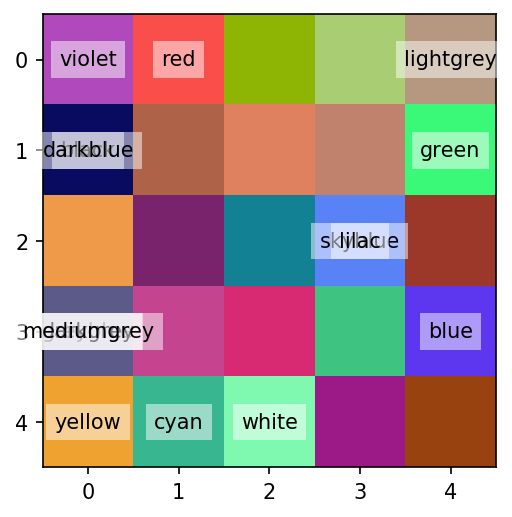

plot of state:  1


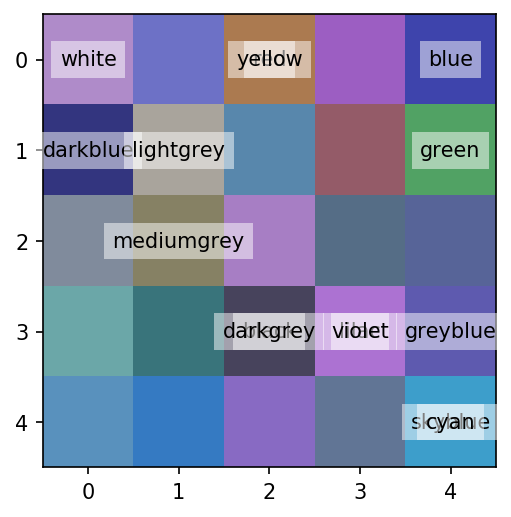

In [39]:
# Drawing all the history
plt.rcParams['figure.dpi'] = 150
map1.draw_all(drawtype, labels=labels)

plot of state:  0


/home/plato/anaconda3/envs/torch/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


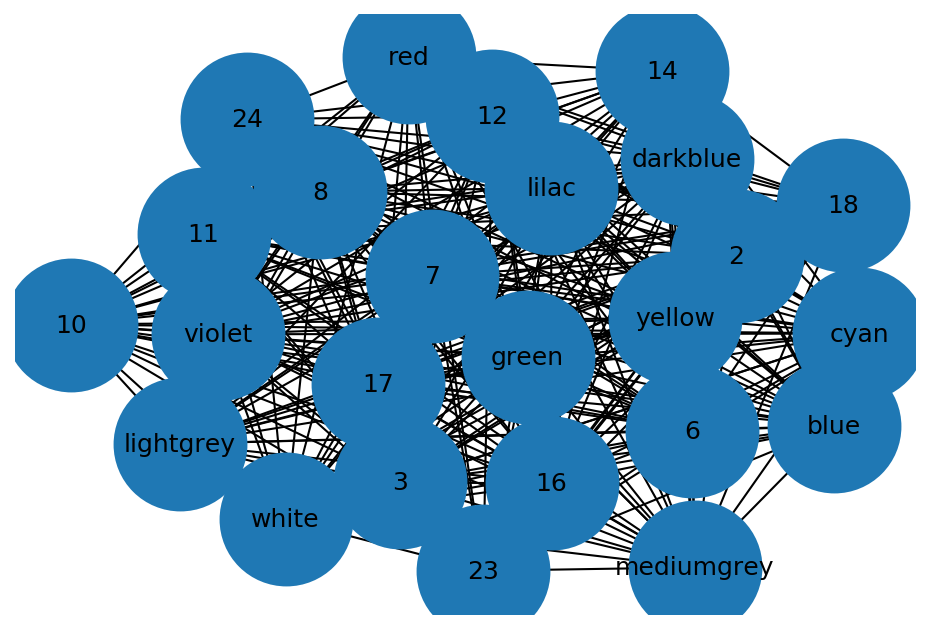

plot of state:  1


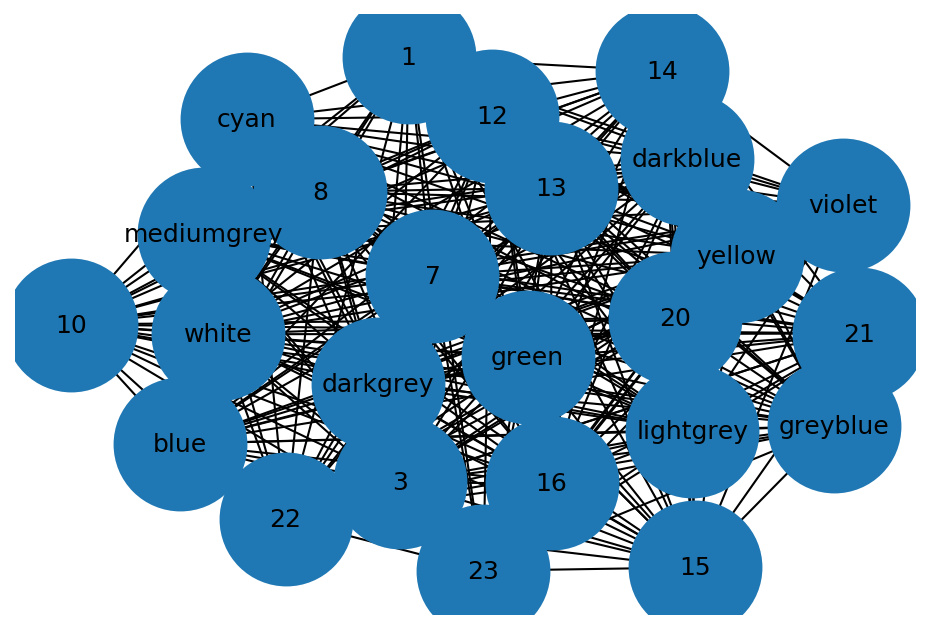

In [40]:
map1.draw_all(drawtype="networkx", labels=labels)